In [187]:
%matplotlib inline
import scipy
from scipy import stats

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

import wbdata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
gdp_gini_subset = pd.read_csv('wb_data2.csv', sep='\t')
#print gdp_gini_subset.head()
print gdp_gini_subset.describe()

                 gdp         gini
count    3689.000000  3678.000000
mean    16315.040849    39.348777
std     20187.357669     8.441426
min       408.574400    16.230000
25%      2945.718682    33.060000
50%      8451.107309    37.890000
75%     22850.478421    44.200000
max    140037.115597    64.790000


In [189]:
gdp_bins  = [408, 2945, 22850, 140037]
gini_bins = [16,  33,   44,    65]
group_names = ['Low', 'Average', 'Hight']

In [190]:
gdp_gini_subset['gdp_categories'] = pd.cut(gdp_gini_subset['gdp'], gdp_bins, labels=group_names)
gdp_gini_subset['gini_categories'] = pd.cut(gdp_gini_subset['gini'], gini_bins, labels=group_names)
print gdp_gini_subset[10:15]

   iso_code country        date          gdp   gini gdp_categories  \
10       AW   Aruba  2006-01-01  1876.544682  42.72            Low   
11       AW   Aruba  2005-01-01  1876.544682  42.72            Low   
12       AW   Aruba  2004-01-01  1876.544682  42.72            Low   
13       AW   Aruba  2003-01-01  1876.544682  42.72            Low   
14       AW   Aruba  2002-01-01  1876.544682  42.72            Low   

   gini_categories  
10         Average  
11         Average  
12         Average  
13         Average  
14         Average  


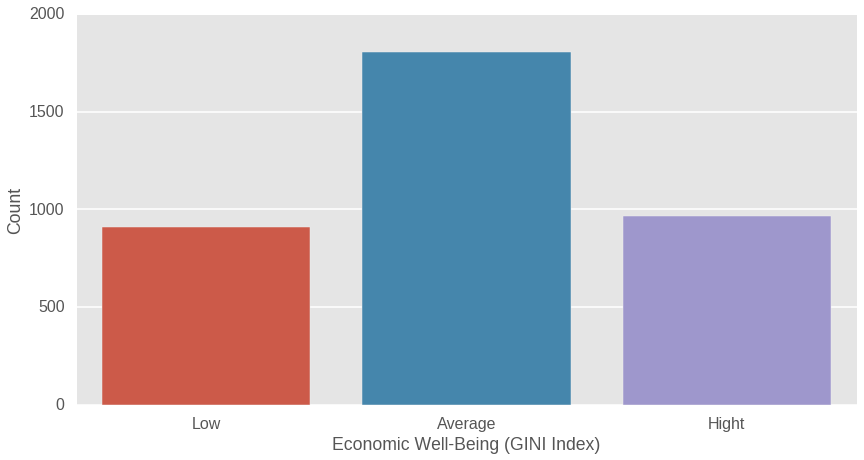

In [191]:

sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gini_categories', data=gdp_gini_subset)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GINI Index)')
plt.show()

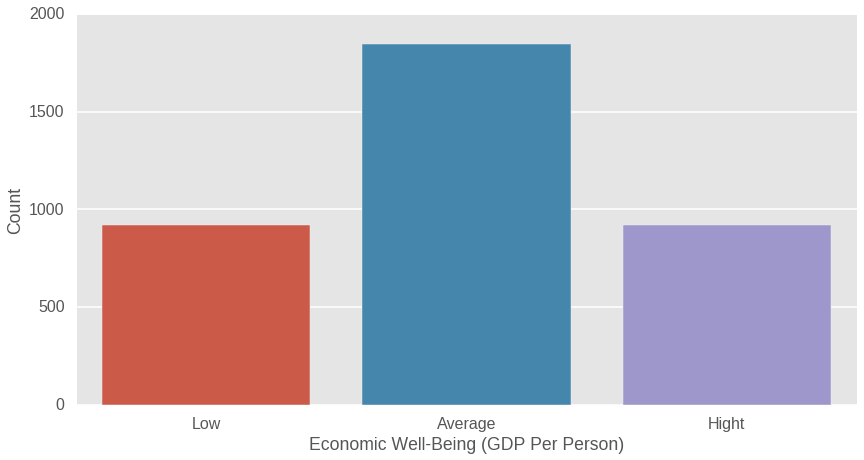

In [192]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gdp_categories', data=gdp_gini_subset)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GDP Per Person)')
plt.show()

In [193]:
#print gdp_gini_subset.head()

pisa_file='pisa_data.csv'
pisa = pd.read_csv(pisa_file, sep='\t')

df4 = pd.merge(gdp_gini_subset, pisa, how='right', on=['iso_code','country','date'])

print df4.head()
print df4.tail()

  iso_code               country        date           gdp   gini  \
0       AL               Albania  2015-01-01  11504.748238  28.96   
1       AL               Albania  2012-01-01  10526.248328  28.96   
2       AL               Albania  2009-01-01   8823.802984  29.98   
3       AL               Albania  2000-01-01   4026.537422  42.67   
4       AE  United Arab Emirates  2015-01-01  70245.932500  42.67   

  gdp_categories gini_categories        Math     Reading  
0        Average             Low  413.157000  405.258800  
1        Average             Low  394.329333  393.964252  
2        Average             Low  377.461056  384.816602  
3        Average         Average  381.000000  348.849512  
4          Hight         Average  427.482700  433.542300  
    iso_code        country        date           gdp   gini gdp_categories  \
335       US  United States  2003-01-01  39677.198348  40.46          Hight   
336       US  United States  2000-01-01  36449.855115  40.46          Hig

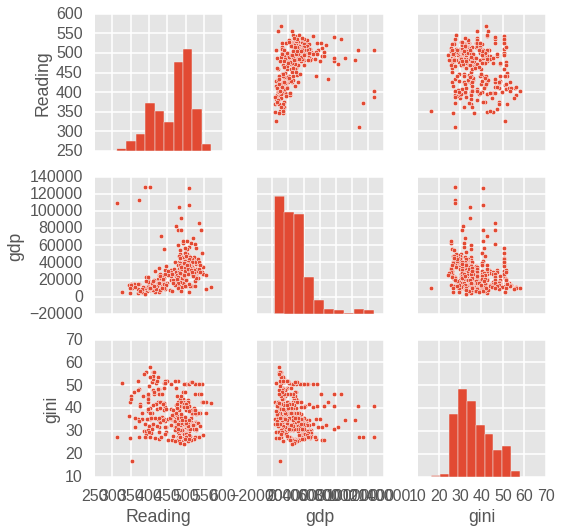

In [219]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.pairplot(df4[['Reading','gdp', 'gini']])
sns.plt.show()

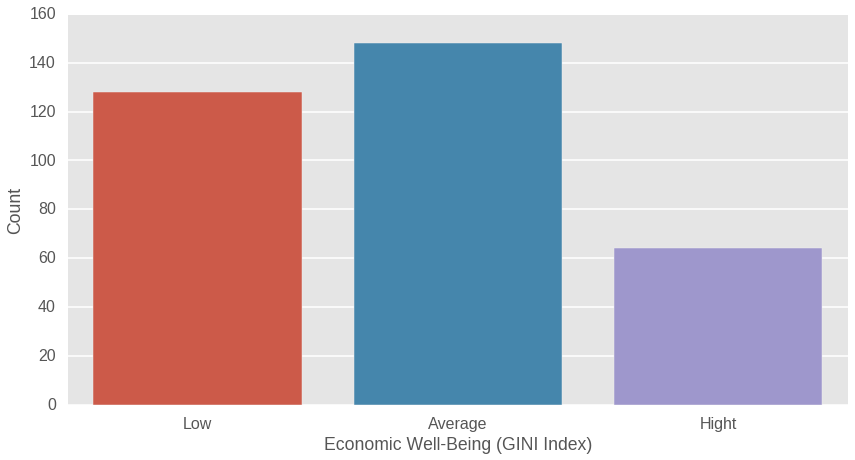

In [194]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gini_categories', data=df4)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GINI Index)')
plt.show()

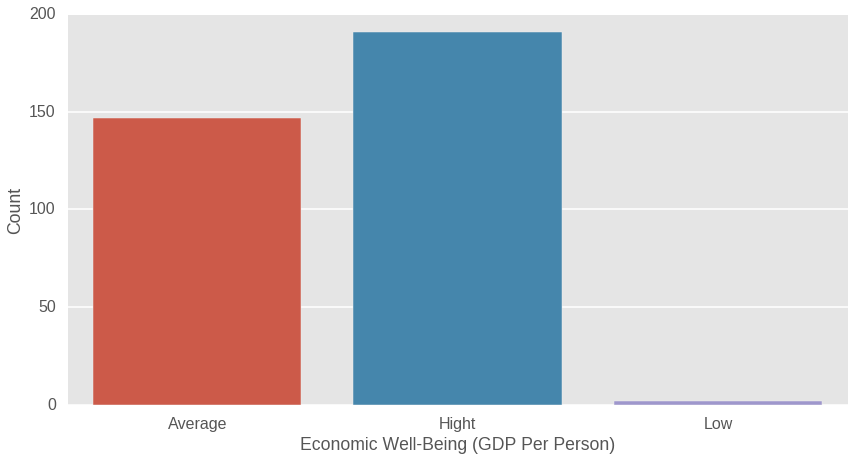

In [195]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gdp_categories', data=df4)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GDP Per Person)')
plt.show()

# H0 - hypitize that Gini index is not correlated with results in PISA test in Math

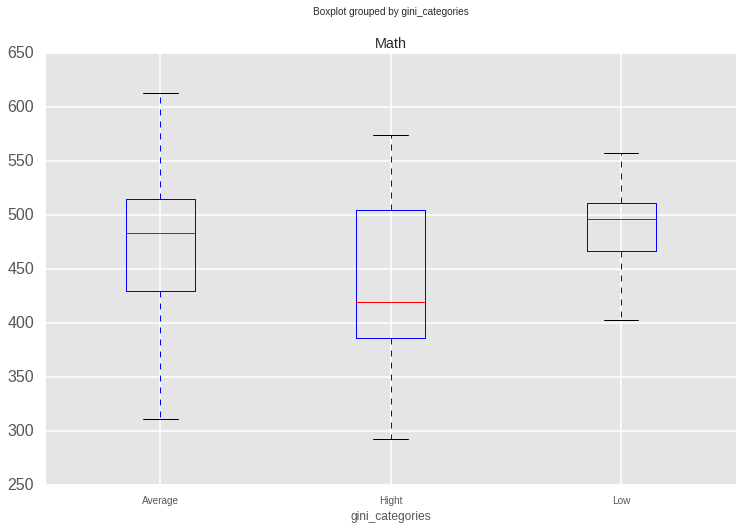

In [196]:
#pd.options.display.mpl_style = 'default'
import matplotlib
matplotlib.style.use('ggplot')
df4.boxplot('Math', by='gini_categories', figsize=(12,8))

In [197]:
groups = df4.groupby("gini_categories").groups
#print groups
#exit(0)
low_gini = df4.loc[df4['gini_categories'] == 'Low'].Math
shapiro_results = scipy.stats.shapiro(low_gini)
#shapiro_results = scipy.stats.shapiro(groups["Low"])
print "*** Low GINI check normal***"
print shapiro_results

#print low_gini
av_gini =  df4.loc[df4['gini_categories'] == 'Average'].Math
shapiro_results = scipy.stats.shapiro(av_gini)
print "*** AVERAGE GINI check normal ***"
print shapiro_results


hi_gini =  df4.loc[df4['gini_categories'] == 'Hight'].Math
shapiro_results = scipy.stats.shapiro(hi_gini)
print "*** HIGHT GINI check normal ***"
print shapiro_results

mod = ols('Math ~ gini_categories', data=df4).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print aov_table
print esq_sm



*** Low GINI check normal***
(0.8683828711509705, 2.7610620456641755e-09)
*** AVERAGE GINI check normal ***
(0.9701362252235413, 0.002589564770460129)
*** HIGHT GINI check normal ***
(0.9207924604415894, 0.0005365177639760077)
                         sum_sq   df          F    PR(>F)
gini_categories    79964.077151    2  12.860788  0.000004
Residual         1047676.646410  337        NaN       NaN
0.0709127255519


# H0 - hypitize that Gini index is not correlated with results in PISA test in Reading

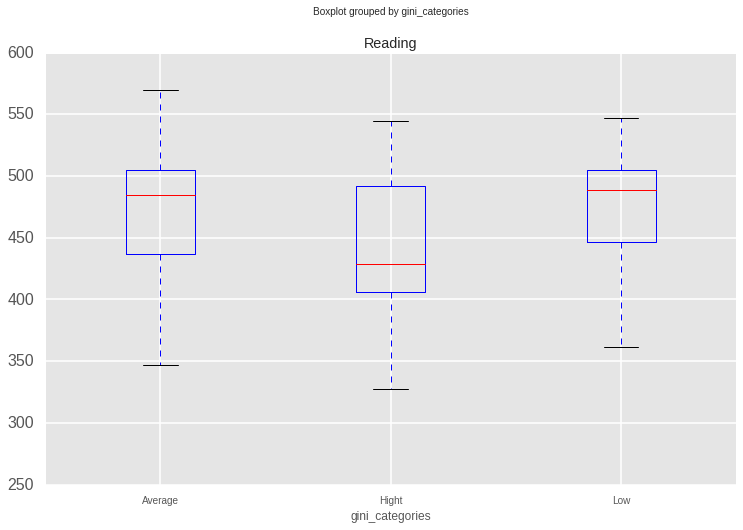

In [198]:
df4.boxplot('Reading', by='gini_categories', figsize=(12,8))

In [199]:
groups = df4.groupby("gini_categories").groups
#print groups
#exit(0)
low_gini = df4.loc[df4['gini_categories'] == 'Low'].Reading
shapiro_results = scipy.stats.shapiro(low_gini)
#shapiro_results = scipy.stats.shapiro(groups["Low"])
print "*** Low GINI check normal***"
print shapiro_results

#print low_gini
av_gini =  df4.loc[df4['gini_categories'] == 'Average'].Reading
shapiro_results = scipy.stats.shapiro(av_gini)
print "*** AVERAGE GINI check normal ***"
print shapiro_results


hi_gini =  df4.loc[df4['gini_categories'] == 'Hight'].Reading
shapiro_results = scipy.stats.shapiro(hi_gini)
print "*** HIGHT GINI check normal ***"
print shapiro_results

mod = ols('Reading ~ gini_categories', data=df4).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print aov_table
print esq_sm

*** Low GINI check normal***
(0.8668645024299622, 2.3649253666491177e-09)
*** AVERAGE GINI check normal ***
(0.9487656354904175, 2.9285931304912083e-05)
*** HIGHT GINI check normal ***
(0.9630557298660278, 0.052549246698617935)
                        sum_sq   df         F    PR(>F)
gini_categories   39251.610118    2  7.652967  0.000562
Residual         864226.423160  337       NaN       NaN
0.0434450077063


In [200]:
df6 = gdp_gini_subset.assign(gini_gdp_categories=gdp_gini_subset['gini_categories'].astype('str')+'_'+gdp_gini_subset['gdp_categories'].astype('str'))
print df6.head()

  iso_code country        date          gdp   gini gdp_categories  \
0       AW   Aruba  2016-01-01  35973.78051  42.72          Hight   
1       AW   Aruba  2015-01-01  35973.78051  42.72          Hight   
2       AW   Aruba  2014-01-01  35973.78051  42.72          Hight   
3       AW   Aruba  2013-01-01  35973.78051  42.72          Hight   
4       AW   Aruba  2012-01-01  35973.78051  42.72          Hight   

  gini_categories gini_gdp_categories  
0         Average       Average_Hight  
1         Average       Average_Hight  
2         Average       Average_Hight  
3         Average       Average_Hight  
4         Average       Average_Hight  


# H0 - hypitize that Gini-GDP index is not correlated with results in PISA test in Math

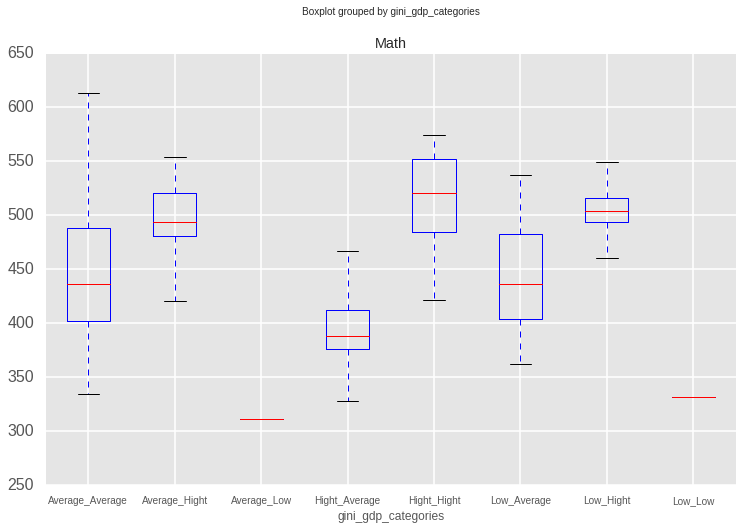

In [201]:
df4 = df4.assign(gini_gdp_categories=df4['gini_categories']+'_'+df4['gdp_categories'])
df4.boxplot('Math', by='gini_gdp_categories', figsize=(12,8))

In [206]:
print df4.loc[df4['gini_gdp_categories']=='Low_Low']
print df4.loc[df4['gini_gdp_categories']=='Average_Low']
df4 = df4[df4.gini_gdp_categories != 'Low_Low']
df4 = df4[df4.gini_gdp_categories != 'Average_Low']

    iso_code          country        date          gdp   gini gdp_categories  \
183       KG  Kyrgyz Republic  2009-01-01  2746.102655  29.87            Low   

    gini_categories        Math     Reading gini_gdp_categories  
183             Low  331.155509  314.019886             Low_Low  
    iso_code          country        date          gdp   gini gdp_categories  \
184       KG  Kyrgyz Republic  2006-01-01  2218.727934  37.38            Low   

    gini_categories        Math     Reading gini_gdp_categories  
184         Average  310.583831  284.706591         Average_Low  


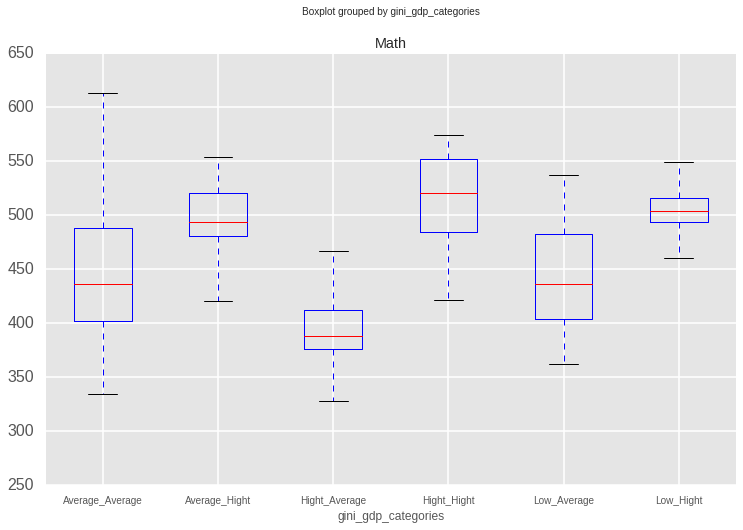

In [208]:
df4.boxplot('Math', by='gini_gdp_categories', figsize=(12,8))

In [209]:
mod = ols('Math ~ gini_gdp_categories', data=df5).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print aov_table
print esq_sm

                            sum_sq   df          F        PR(>F)
gini_gdp_categories  492222.430322    6  44.614773  6.700227e-40
Residual             610477.330891  332        NaN           NaN
0.44637937509


In [68]:
'''
H0 - hypitize that GDP index is not correlated with results in PISA test
Can't check cause very few data with low GDP
'''
'''
print "*******************GINI ANOVA**********************************"
low_gdp = df4.loc[df4['gdp_categories'] == 'Low'].Math
shapiro_results = scipy.stats.shapiro(low_gdp)
print "*** Low GDP check normal***"
print shapiro_results

#print low_gini
av_gdp =  df4.loc[df4['gdp_categories'] == 'Average'].Math
shapiro_results = scipy.stats.shapiro(av_gdp)
print "*** AVERAGE GDP check normal ***"
print shapiro_results


hi_gdp =  df4.loc[df4['gdp_categories'] == 'Hight'].Math
shapiro_results = scipy.stats.shapiro(hi_gdp)
print "*** HIGHT GDP check normal ***"
print shapiro_results

f_val, p_val = stats.f_oneway(low_gdp, av_gdp, hi_gdp)

print "One-way ANOVA F =", f_val
print "One-way ANOVA P =", p_val 

print "*************************************************************"
'''
 

'\nprint "*******************GINI ANOVA**********************************"\nlow_gdp = df4.loc[df4[\'gdp_categories\'] == \'Low\'].Math\nshapiro_results = scipy.stats.shapiro(low_gdp)\nprint "*** Low GDP check normal***"\nprint shapiro_results\n\n#print low_gini\nav_gdp =  df4.loc[df4[\'gdp_categories\'] == \'Average\'].Math\nshapiro_results = scipy.stats.shapiro(av_gdp)\nprint "*** AVERAGE GDP check normal ***"\nprint shapiro_results\n\n\nhi_gdp =  df4.loc[df4[\'gdp_categories\'] == \'Hight\'].Math\nshapiro_results = scipy.stats.shapiro(hi_gdp)\nprint "*** HIGHT GDP check normal ***"\nprint shapiro_results\n\nf_val, p_val = stats.f_oneway(low_gdp, av_gdp, hi_gdp)\n\nprint "One-way ANOVA F =", f_val\nprint "One-way ANOVA P =", p_val \n\nprint "*************************************************************"\n'